<a href="https://colab.research.google.com/github/SelinOlcay/peniot/blob/master/MidtermAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

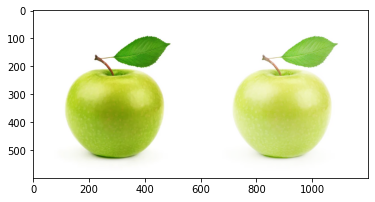

In [34]:
#Gamma Donusumu
import cv2
import numpy as np
from matplotlib import pyplot as plt

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

img = cv2.imread('elma.jpg')
gammaImg = gammaCorrection(img, 2.2)

res = np.hstack((img,gammaImg))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

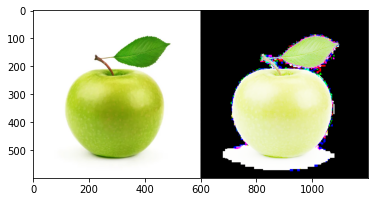

In [5]:
#Logaritmik Donusum
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide = 'ignore')
   
image = cv2.imread('elma.jpg')
   
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
   
log_image = np.array(log_image, dtype = np.uint8)

res = np.hstack((image,log_image))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

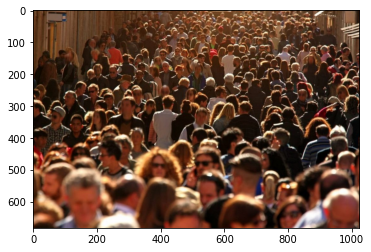

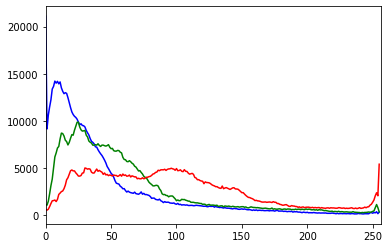

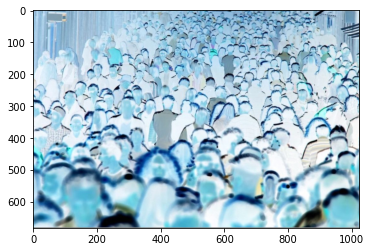

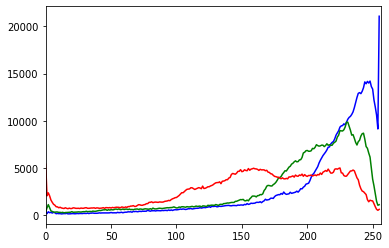

In [13]:
#Negatifini Alma
import cv2
import matplotlib.pyplot as plt
  
img_bgr = cv2.imread('toplum.jpg', 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_bgr], 
                         [i], None,
                         [256], 
                         [0, 256])
      
    plt.plot(histr, color = col)
      
    # Limit X - axis to 256
    plt.xlim([0, 256])
      
plt.show()

height, width, _ = img_bgr.shape
  
for i in range(0, height - 1):
    for j in range(0, width - 1):
   
        pixel = img_bgr[i, j]
          
        pixel[0] = 255 - pixel[0]
       
        pixel[1] = 255 - pixel[1]
        
        pixel[2] = 255 - pixel[2]
       
        img_bgr[i, j] = pixel

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()
  
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_bgr], 
                         [i], None,
                         [256],
                         [0, 256])
      
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
      
plt.show()

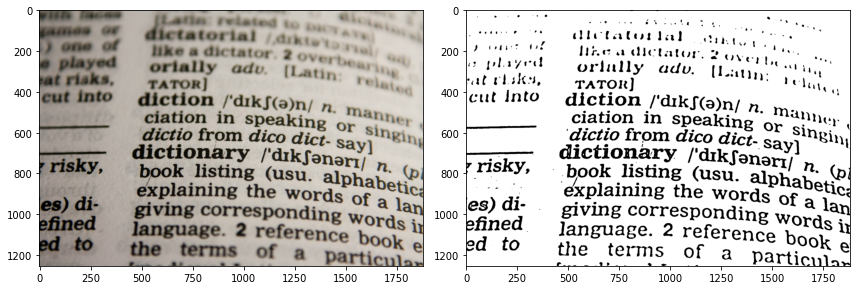

In [20]:
#Uzerinde metin olan resmin yazilarini netlestirme
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('page.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

mask = cv2.adaptiveThreshold(blurred, 
                              255, 
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                              cv2.THRESH_BINARY, 
                              31, 
                              10)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.tight_layout()

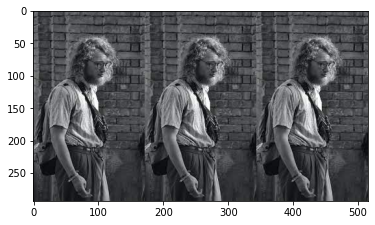

In [25]:
#Gri olcekli resmi 8,16,24 bite cevir
img = cv2.imread('images.jpeg')
img8 = img.astype('uint8')
img16 = img.astype('uint16')
res = np.hstack((img,img8,img16))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

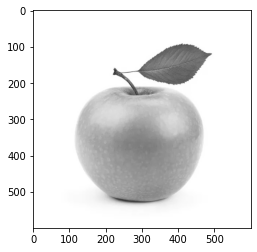

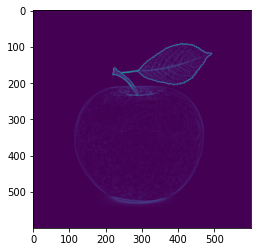

In [26]:
#Sobel - Prewitt - Robert cross filtreleme
import cv2 
import numpy as np
from scipy import ndimage

roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
image = cv2.imread('elma.jpg',0)
img = cv2.imread('elma.jpg',0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(edged_img)
plt.show()

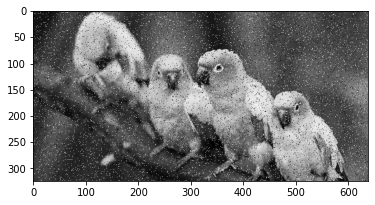

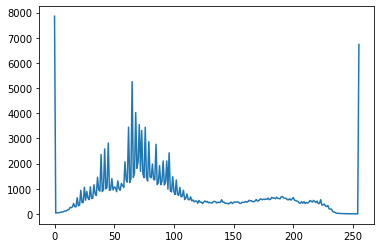

In [30]:
#Tuz biber goruntu olusturma ve histogram cikarma
import random
import cv2
 
def add_noise(img):
 
    row , col = img.shape

    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        y_coord=random.randint(0, row - 1)

        x_coord=random.randint(0, col - 1)

        img[y_coord][x_coord] = 255

    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        y_coord=random.randint(0, row - 1)

        x_coord=random.randint(0, col - 1)

        img[y_coord][x_coord] = 0

    return img

img = cv2.imread('image.jpeg',cv2.IMREAD_GRAYSCALE)
 
cv2.imwrite('image.jpeg',add_noise(img))
noise=add_noise(img)
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB))
plt.show()
histr = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(histr)
plt.show()

# Yeni Bölüm